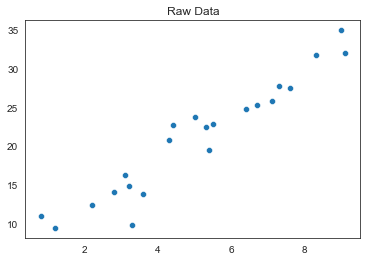

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(0)

# produce a synthetic linear dataset with gaussian noise
x = torch.tensor([0.8, 2.2, 3.1, 4.4, 5.0, 3.6, 8.3, 7.6, 9.1, 1.2, 3.2,
                  4.3, 5.3, 6.7, 7.3, 2.8, 9.0, 7.1, 6.4, 5.4, 3.3, 5.5]).reshape(-1, 1)
noise = np.random.normal(0, 2, x.shape)
slope, intercept = 3, 5
y = slope * x + intercept + noise
y = y.float()

# plot the data
sns.set_style('white')
sns.scatterplot(x=x.reshape(-1), y=y.reshape(-1))
plt.title('Raw Data')
plt.show()

# split the data into training and validation set
data_train, data_val, labels_train, labels_val = train_test_split(x, y, test_size=0.25, random_state=0)

In [2]:
# defines the training loop for our model
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_val,
                  y_train, y_val):

    for epoch in range(1, n_epochs + 1):

        # forward pass
        output_train = model(x_train)
        loss_train = loss_fn(output_train, y_train)
        output_val = model(x_val)
        loss_val = loss_fn(output_val.float(), y_val)

        # backward pass
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        # printing the output
        if epoch == 1 or epoch % 500 == 0:
            print(f'Epoch {epoch}, Training loss {loss_train.item():.3f}, '
                  f'Validation loss {loss_val.item():.3f}')

In [3]:
import torch.nn as nn
import torch.optim as optim

# use a single neuron for linear regression (bias is true by default)
linear_model = nn.Linear(1, 1, bias=True)

# define the optimizer and its learning rate
learning_rate = 1e-2
adam_optimizer = optim.Adam(linear_model.parameters(), lr=learning_rate)

# define the loss function
mse_loss = nn.MSELoss()

# calls the training loop
training_loop(n_epochs=2000,
              optimizer=adam_optimizer,
              model=linear_model,
              loss_fn=mse_loss,
              x_train=data_train,
              x_val=data_val,
              y_train=labels_train,
              y_val=labels_val)

print('Weight:', linear_model.weight.data[0][0], 'Bias:', linear_model.bias.data[0])

Epoch 1, Training loss 544.314, Validation loss 406.522
Epoch 500, Training loss 11.586, Validation loss 6.534
Epoch 1000, Training loss 4.877, Validation loss 5.076
Epoch 1500, Training loss 4.502, Validation loss 5.356
Epoch 2000, Training loss 4.134, Validation loss 5.672
Weight: tensor(3.1910) Bias: tensor(4.9626)


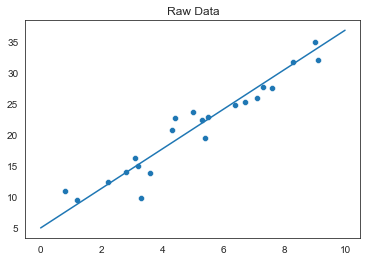

In [4]:
# create a line from the weight and bias
weight = float(linear_model.weight.data[0][0])
bias = float(linear_model.bias.data[0])
x_line = np.linspace(0, 10, 5)
y_line = weight * x_line + bias

# plot the data
sns.scatterplot(x=x.reshape(-1), y=y.reshape(-1))
sns.lineplot(x=x_line, y=y_line)
plt.title('Raw Data')
plt.show()

In [5]:
deep_model = nn.Sequential(
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1)
)

deep_model

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [8]:
# define the optimizer and its learning rate
learning_rate = 1e-3
sgd_optimizer = optim.SGD(deep_model.parameters(), lr=learning_rate)

# calls the training loop
training_loop(n_epochs=3000,
              optimizer=sgd_optimizer,
              model=deep_model,
              loss_fn=mse_loss,
              x_train=data_train,
              x_val=data_val,
              y_train=labels_train,
              y_val=labels_val)

Epoch 1, Training loss 4.541, Validation loss 8.455
Epoch 500, Training loss 4.113, Validation loss 7.681
Epoch 1000, Training loss 3.926, Validation loss 7.375
Epoch 1500, Training loss 3.824, Validation loss 7.253
Epoch 2000, Training loss 3.759, Validation loss 7.203
Epoch 2500, Training loss 3.713, Validation loss 7.183
Epoch 3000, Training loss 3.678, Validation loss 7.175


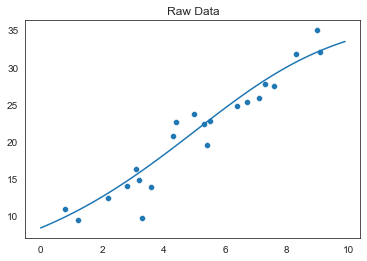

In [9]:
x_line = torch.arange(0, 10, 0.1).unsqueeze(1)
y_line = deep_model(x_line)

# plot the data
sns.scatterplot(x=x.reshape(-1), y=y.reshape(-1))
sns.lineplot(x=x_line.flatten().detach().numpy(), y=y_line.flatten().detach().numpy())
plt.title('Raw Data')
plt.show()